In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [139]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [140]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [141]:
# calculating sum
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [142]:
# transorming the dtype of "time"
df=df.dropna()
df["time"] = pd.to_datetime(df["time"])
df = df.drop('Unnamed: 0', axis=1)

In [143]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/2364289440.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/2364289440.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/2364289440.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')


In [144]:
df.describe(include="all")


/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/1519091745.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,id,time,variable,value
count,376710,376710,376710,376710.000000
unique,27,336907,19,NaN
top,01,2014-04-17 18:00:00,screen,NaN
freq,21982,90,96578,NaN
first,NaN,2014-02-17 07:00:52.197000,NaN,NaN
last,NaN,2014-06-09 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,40.665313
std,NaN,NaN,NaN,273.726007
min,NaN,NaN,NaN,-82798.871000
25%,NaN,NaN,NaN,2.025000


/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/16994401.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/16994401.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


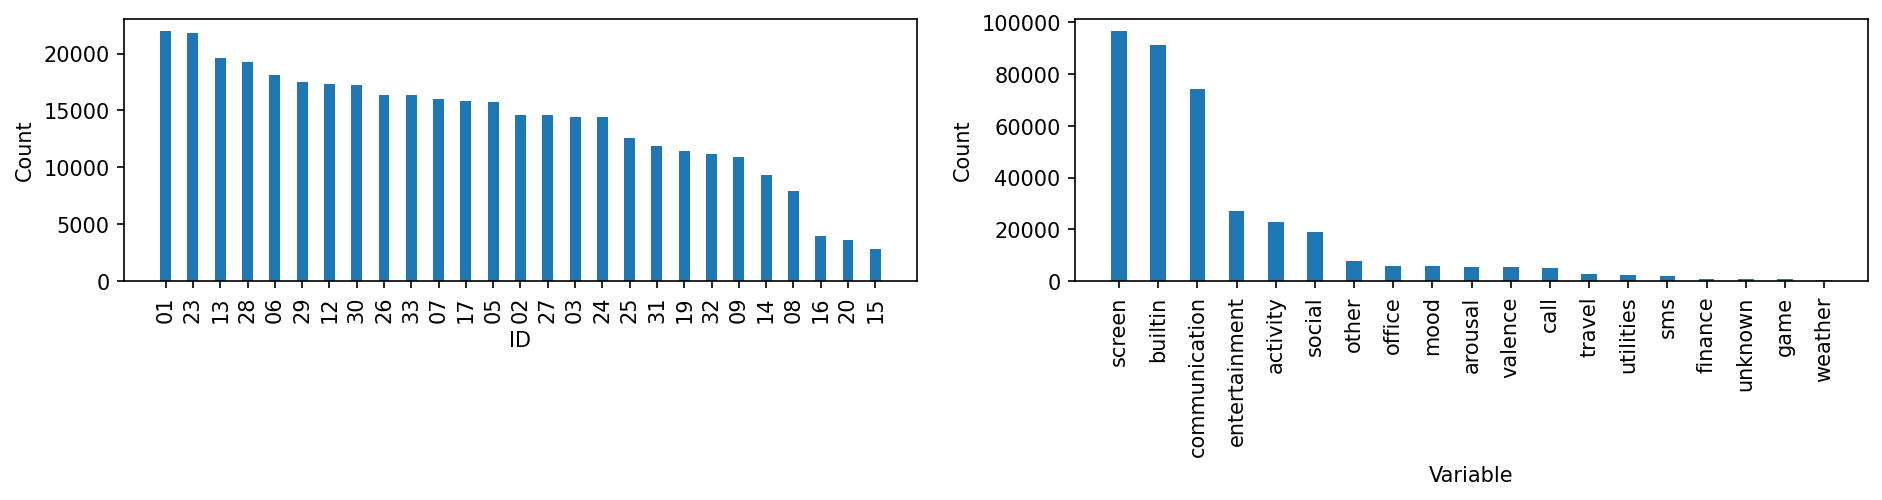

In [145]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


- It can be seen that the amount of data collected for various id's is different.
- Similarly, the observed data per variable is non homgenously distributed

# Plotting Graphs

In [146]:
# import warnings
# warnings.filterwarnings('ignore')

# x = df['id'].value_counts()
# cols = [i for i in x.axes[0]]
# count = 1
# for i in cols:
#     # plt.subplot(14,2,count)
#     # count += 1

#     grouped = df.groupby('id')
#     col = grouped.get_group(i)

#     x = col['variable'].value_counts()
#     x = [i for i in x.axes[0]]
#     y = list(col['variable'].value_counts())
#     z=x
#     data_list = pd.DataFrame(
#         {'x_axis': x,
#         'y_axis': y,
#         'category': z
#         })

#     minsize = min(data_list['y_axis'])
#     maxsize = max(data_list['y_axis'])

#     sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(100,100), data=data_list)
#     sns.set_style('darkgrid')
#     plt.xticks(rotation=90)
#     plt.xlabel('Variables')
#     plt.ylabel('Count')
#     plt.title(f'Count of variables per id for participant {i}')
# # plt.show()

In [147]:
# for variable in df['variable'].unique():
#     temp_df = df[df['variable'] == variable]
#     group = temp_df.groupby('id')['value'].mean().reset_index()
#     # plot the grouped data
#     sns.set(rc={'figure.figsize':(10,5)})
#     sns.scatterplot(x=group['id'], y = group['value'])
#     plt.xlabel('id')
#     plt.ylabel('mean value')
#     plt.title(f'Mean value of {variable} column for each id')
#     plt.figure(figsize=(200, 5))
#     plt.show()

# Transforming the data

In [148]:
df['time'][:10]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/3470066433.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['time'][:10]


0   2014-02-26 13:00:00
1   2014-02-26 15:00:00
2   2014-02-26 18:00:00
3   2014-02-26 21:00:00
4   2014-02-27 09:00:00
5   2014-02-27 12:00:00
6   2014-02-27 15:00:00
7   2014-03-21 09:00:00
8   2014-03-21 11:00:00
9   2014-03-21 15:00:00
Name: time, dtype: datetime64[ns]

In [149]:
df['date'] = df['time'].dt.date



In [150]:
df['date'][:5]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/1752055502.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['date'][:5]


0    2014-02-26
1    2014-02-26
2    2014-02-26
3    2014-02-26
4    2014-02-27
Name: date, dtype: object

In [151]:
import numpy as np
new_df_mean = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='mean').reset_index()
new_df_sum = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='sum').reset_index()

print(new_df_mean.head(5))
print(new_df_sum.head(5))

variable  id        date  activity  arousal  builtin  call  communication  \
0         01  2014-02-17       NaN      NaN      NaN   1.0            NaN   
1         01  2014-02-18       NaN      NaN      NaN   1.0            NaN   
2         01  2014-02-19       NaN      NaN      NaN   1.0            NaN   
3         01  2014-02-20       NaN      NaN      NaN   1.0            NaN   
4         01  2014-02-21       NaN      NaN      NaN   NaN            NaN   

variable  entertainment  finance  game  ...  office  other  screen  sms  \
0                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
1                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
2                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
3                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
4                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   

variable  social  travel  unknown  utilities  valence  weather  
0            NaN     

In [152]:
df['variable'].unique()

array(['mood', 'arousal', 'valence', 'activity', 'screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'], dtype=object)

In [153]:
# Picking mood, valence, arousal and activity from new_df_mean while other from new_df_sum
transformed_df = pd.concat([new_df_mean[['id', 'date','mood', 'arousal', 'valence', 'activity']], new_df_sum[['screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather']]], axis=1).reset_index(drop=True)

transformed_df.head(5)

variable,id,date,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,01,2014-02-17,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2014-02-18,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,2014-02-19,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,2014-02-20,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
transformed_df['date'] = pd.to_datetime(transformed_df['date'])
print(transformed_df.dtypes)
transformed_df['date'][:10]

variable
id                       object
date             datetime64[ns]
mood                    float64
arousal                 float64
valence                 float64
activity                float64
screen                  float64
call                    float64
sms                     float64
builtin                 float64
communication           float64
entertainment           float64
finance                 float64
game                    float64
office                  float64
other                   float64
social                  float64
travel                  float64
unknown                 float64
utilities               float64
weather                 float64
dtype: object


0   2014-02-17
1   2014-02-18
2   2014-02-19
3   2014-02-20
4   2014-02-21
5   2014-02-22
6   2014-02-25
7   2014-02-26
8   2014-02-27
9   2014-02-28
Name: date, dtype: datetime64[ns]

In [155]:
transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
mood,1268.0,6.990063,0.736465,3.000,6.600000,7.000000,7.500000,9.333333
arousal,1268.0,-0.103851,0.662715,-2.000,-0.600000,0.000000,0.400000,2.000000
valence,1266.0,0.687112,0.434602,-1.250,0.400000,0.800000,1.000000,2.000000
activity,1188.0,0.120003,0.098301,0.000,0.054872,0.095634,0.149358,0.566171
screen,1207.0,6027.939920,4696.746814,0.462,2423.275500,5026.947999,8558.515500,36204.105001
call,1338.0,3.915546,3.555254,1.000,1.000000,3.000000,5.000000,31.000000
sms,734.0,2.449591,2.327730,1.000,1.000000,1.000000,3.000000,17.000000
builtin,1195.0,1416.168076,3841.698865,-80367.930,262.656000,764.085000,1558.217000,40323.877000
communication,1183.0,2721.389269,2466.290266,1.095,867.679500,2078.403000,3789.369000,20718.749000


In [156]:
# df_grouped = df.groupby([df['id'], df['variable'], df['time'].dt.date])


# # Apply mean aggregation to "value" column for each group
# df_mean = df_grouped.agg({'value': 'mean'})

# # Reset index to make the groupby columns as regular columns
# df_mean = df_mean.reset_index()

# # Pivot the data
# df_mean['time'] = pd.to_datetime(df_mean['time'])
# new_df = df_mean.pivot(index=['id', 'time'], columns='variable', values='value')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Display the entire dataframe
# #new_df.to_excel('output_file.xlsx', index=True)
# new_df
# #new_df.isnull().sum()


## level 0 visualization

In [157]:
import missingno as msno

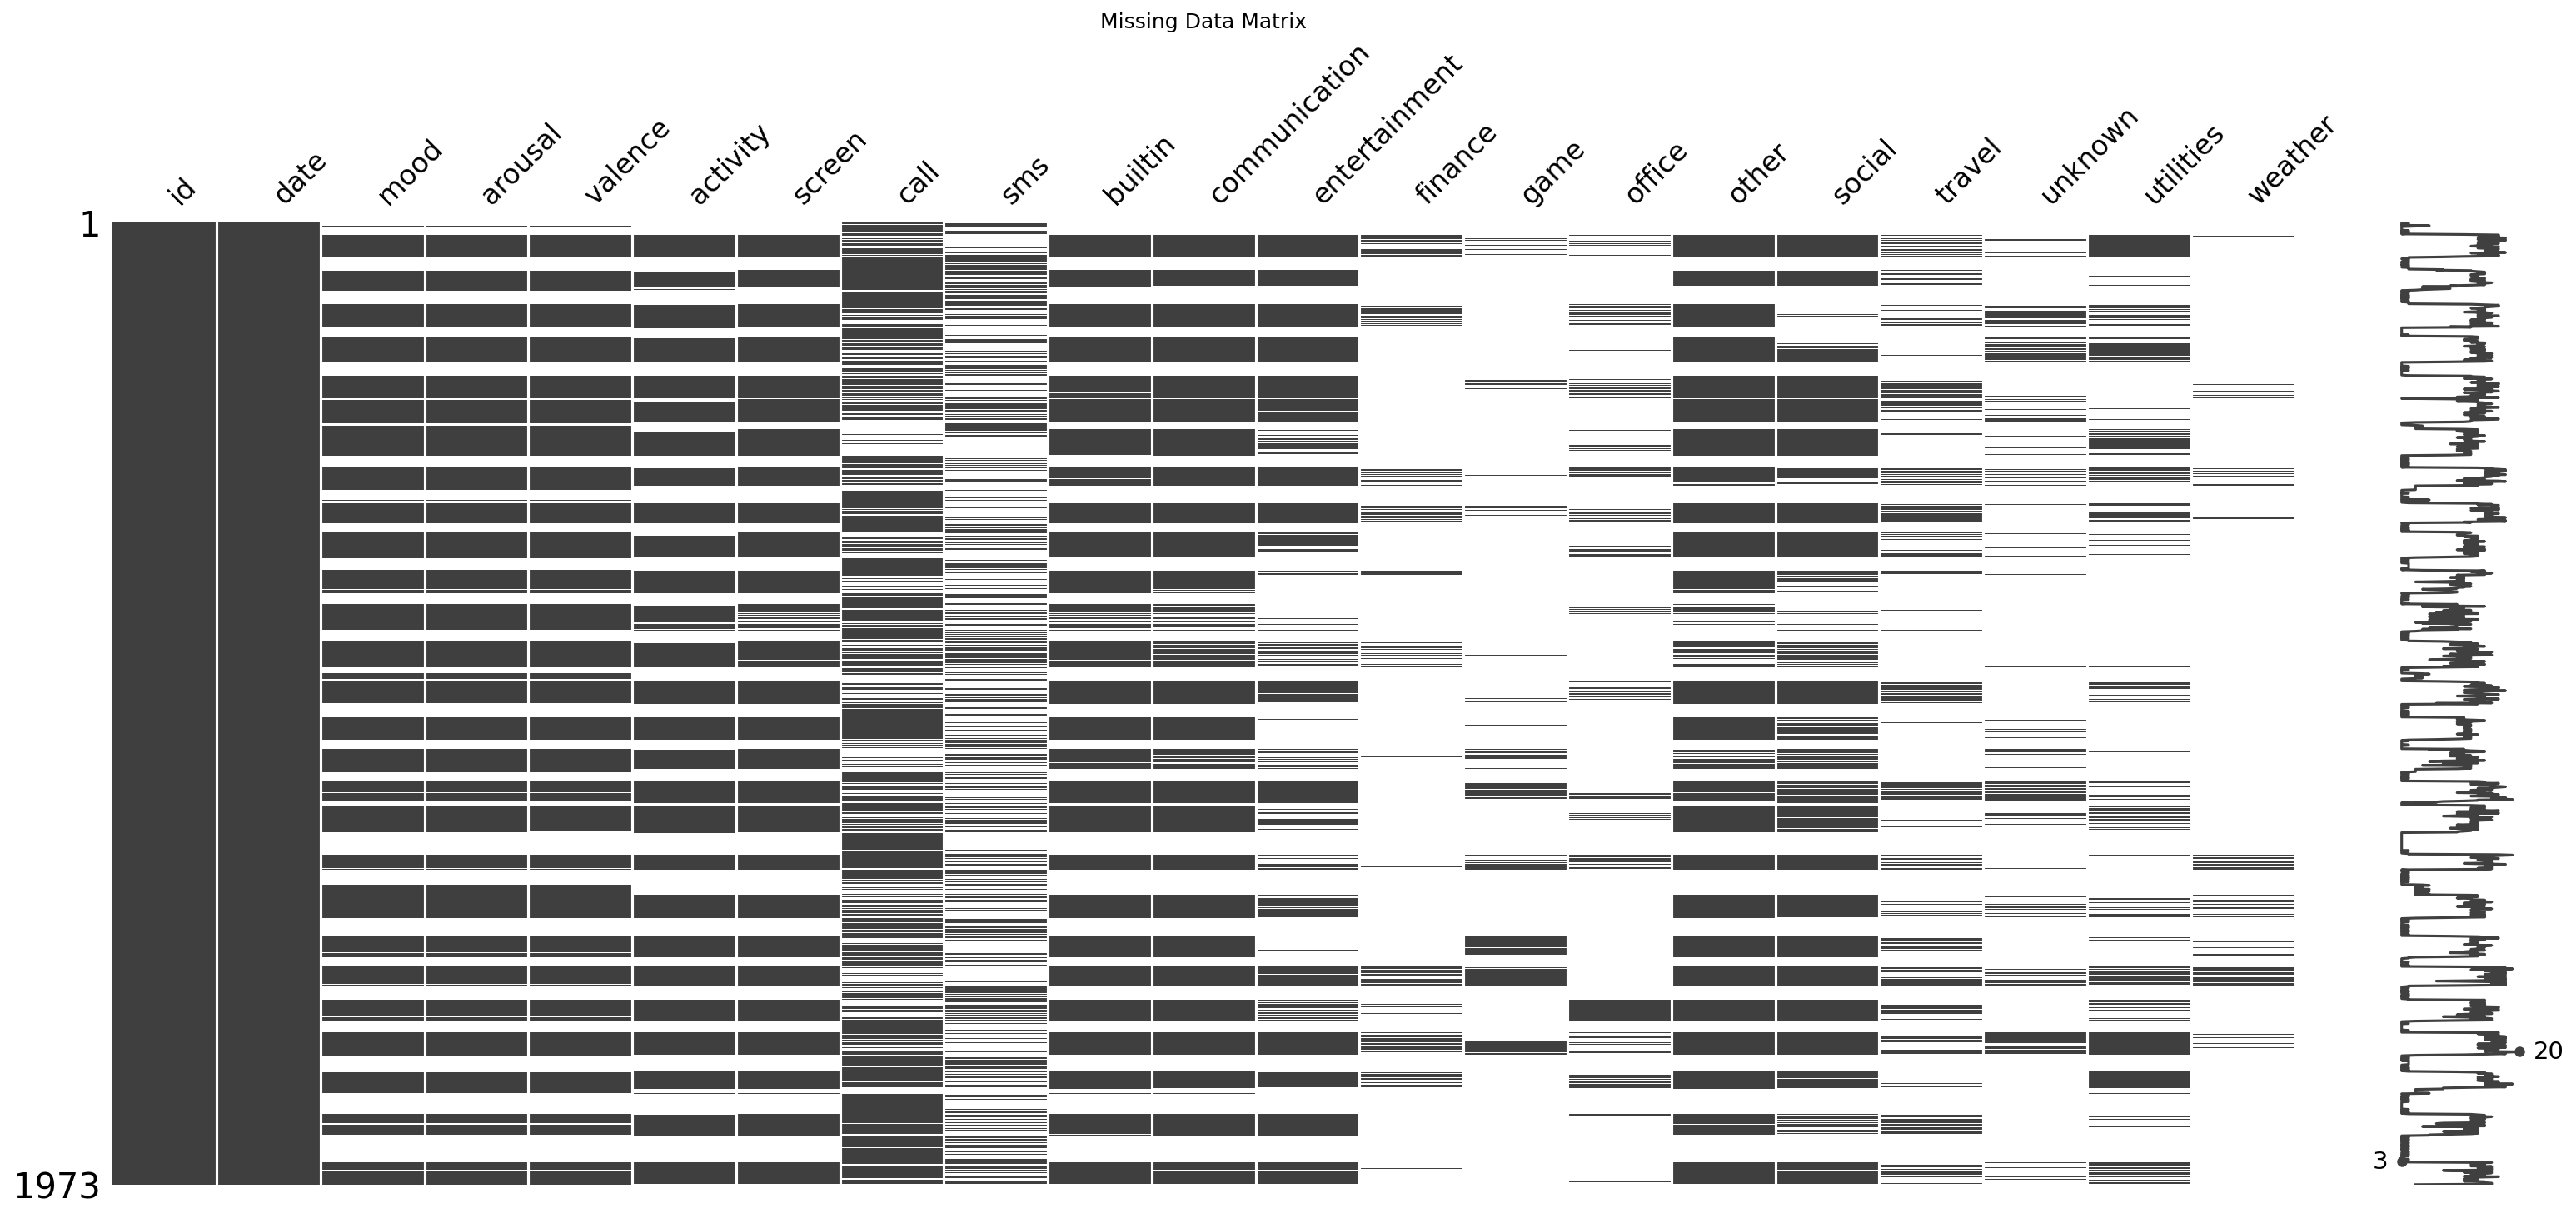

In [158]:
msno.matrix(transformed_df)

# add labels and display the plot
plt.title('Missing Data Matrix')
plt.show()


- Lot of missing values in Unknown, finance, game, weather.

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/273651269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = transformed_df.groupby('id').mean()


Text(0, 0.5, 'Means of Variables')

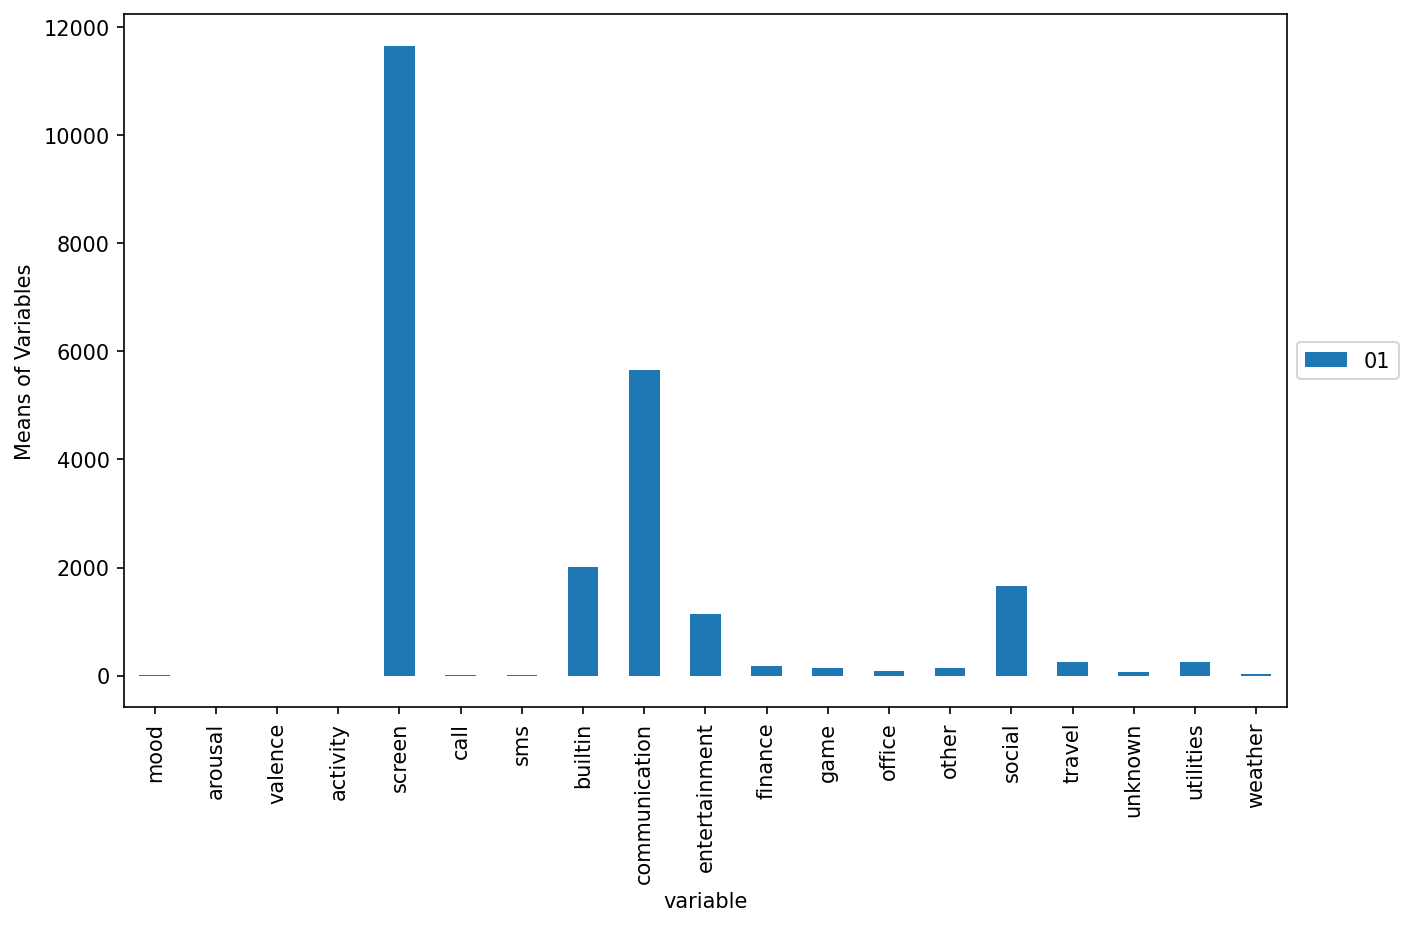

In [159]:
transformed_df['id'] = transformed_df['id'].astype(str)
grouped = transformed_df.groupby('id').mean()

# plot a bar chart of the mean 'value' for each category using matplotlib

plt.rcParams['figure.dpi'] = 150
grouped.loc['01'].plot(kind='bar',figsize=(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Means of Variables')


## Apprach to the NaN's
- Eliminating the rows that have larger than 17 Nan's out of 19 features (too sparse of a data to analyze the day)

Planned methodologies:
1. KNN
2. ARIMA
3. KNN+ARIMA

In [160]:
transformed_df.columns

Index(['id', 'date', 'mood', 'arousal', 'valence', 'activity', 'screen',
       'call', 'sms', 'builtin', 'communication', 'entertainment', 'finance',
       'game', 'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'],
      dtype='object', name='variable')

In [161]:
transformed_df.set_index('date',inplace=True)

print(transformed_df.index)
transformed_df.dtypes


DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-25', '2014-02-26',
               '2014-02-27', '2014-02-28',
               ...
               '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-05-31'],
              dtype='datetime64[ns]', name='date', length=1973, freq=None)


variable
id                object
mood             float64
arousal          float64
valence          float64
activity         float64
screen           float64
call             float64
sms              float64
builtin          float64
communication    float64
entertainment    float64
finance          float64
game             float64
office           float64
other            float64
social           float64
travel           float64
unknown          float64
utilities        float64
weather          float64
dtype: object

In [162]:
(transformed_df.isnull().sum(axis=1)>=17).sum()

666

In [163]:
# eliminating 666 rows
transformed_df = transformed_df[transformed_df.isnull().sum(axis=1)<=17]

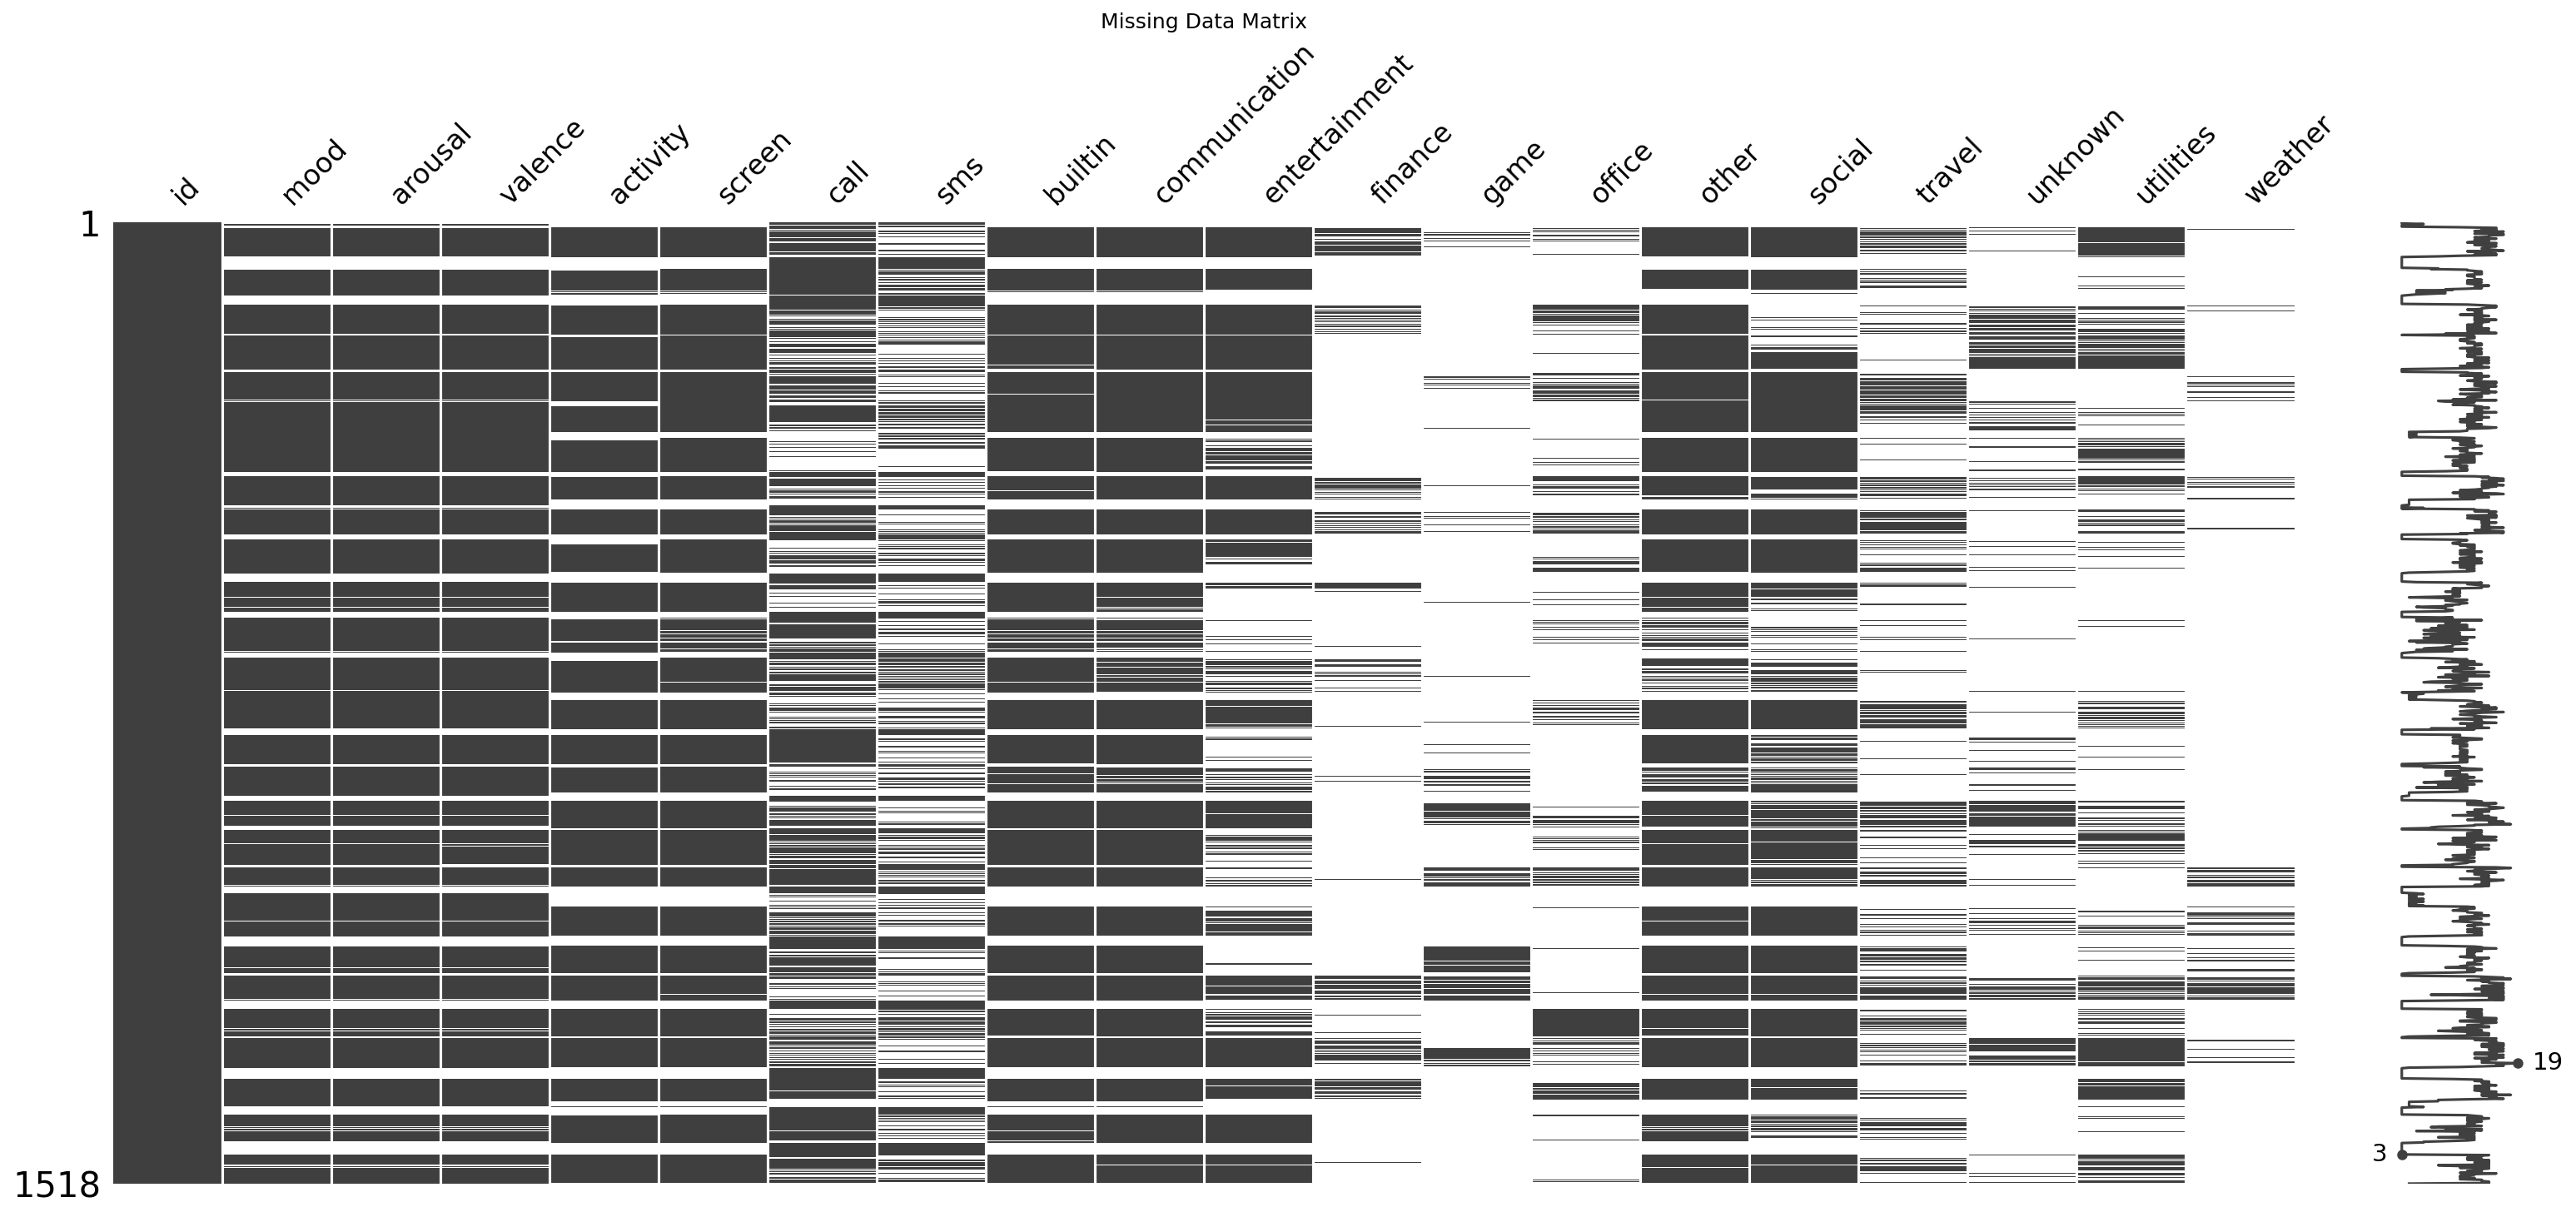

In [164]:
msno.matrix(transformed_df)

# add labels and display the plot
plt.title('Missing Data Matrix')
plt.show()

In [165]:
#knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)


transformed_df_copy = transformed_df.copy()
transformed_df_copy.reset_index(inplace=True)
grouped = transformed_df_copy.groupby('id')

imputed_df = pd.DataFrame()
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date','id']))
    print(feature_names)
    # Loop through each feature and impute missing values with KNN
    for feature_name in feature_names:
        print(feature_name)
        # Convert the feature to a numpy array for imputation
        feature = group[feature_name].values.reshape(-1, 1)
        # Perform KNN imputation
        feature_imputed = imputer.fit_transform(feature)
        # Replace the missing values with the imputed values
        group[feature_name] = feature_imputed
    imputed_df = pd.concat([imputed_df,group])
        
    # Replace the group in the original DataFrame
    #transformed_df_copy.loc[transformed_df_copy['id'] == name] = group

imputed_df.head(10)

['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
activity
builtin
entertainment
sms
office
utilities
communication
['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
activity
builtin
entertainment
sms
office
utilities
communication
['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
acti

variable,date,id,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,2014-02-19,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,7.000000,2.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
1,2014-02-20,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,2.000000,3.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
2,2014-02-22,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,2.000000,1.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
3,2014-02-26,01,6.250000,-0.250000,0.750000,0.090464,11660.409979,1.000000,2.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
4,2014-02-27,01,6.333333,0.000000,0.333333,0.090464,11660.409979,3.179487,1.6,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
5,2014-03-12,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,7.000000,1.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
6,2014-03-14,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,3.000000,1.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
7,2014-03-18,01,7.062411,-0.243262,0.700709,0.090464,11660.409979,1.000000,2.0,2008.627532,...,1130.716447,179.156406,142.401,76.117,133.847826,1665.562106,248.41152,68.2355,257.370511,30.386
8,2014-03-20,01,7.062411,-0.243262,0.700709,0.081548,2275.944000,1.000000,1.6,248.979000,...,350.856000,179.156406,142.401,76.117,11.345000,807.731000,248.41152,45.1730,21.074000,30.386
9,2014-03-21,01,6.200000,0.200000,0.200000,0.134050,17978.907000,6.000000,1.6,3139.218000,...,1007.456000,49.544000,142.401,172.206,239.751000,4508.500000,915.44500,68.2355,598.754000,30.386


In [166]:
imputed_df.isna().sum()


variable
date               0
id                 0
mood               0
arousal            0
valence            0
activity           0
screen             0
call               0
sms                0
builtin            0
communication      0
entertainment      0
finance          694
game             742
office           277
other              0
social             0
travel             0
unknown          232
utilities         51
weather          870
dtype: int64

In [167]:
# since the data in features like finance, game, office, unknown, utilities, weather still has null values, it suggests that these features are too sparse to be imputed
grouped_median = imputed_df.groupby('id').median()
grouped_median['mood']['01']
#grouped

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/271314082.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median = imputed_df.groupby('id').median()


7.06241134751773

In [168]:

# Group the data by 'id'
grouped = imputed_df.groupby('id')
grouped_median = imputed_df.groupby('id').median()

# Create an imputed dataframe
imputed_df_KNN = pd.DataFrame()

# Loop through each group
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date', 'id']))
    # Loop through each feature and impute missing values with the median
    for feature_name in feature_names:
        # Impute the missing values with the median
        group[feature_name].fillna(value = grouped_median[feature_name][name],inplace = True)
        #print(group.isna().sum())
        # Replace the missing values with the imputed values
        
    
    # Add the imputed group to the imputed dataframe
    if group.isna().sum().sum() > 0:
        # If there are NaNs, replace them with the median of the entire dataset
        group.fillna(value=group[feature_names].median(), inplace=True)

    imputed_df_KNN = pd.concat([imputed_df_KNN, group])

imputed_df_KNN.isna().sum()

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_40240/8744364.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_median = imputed_df.groupby('id').median()


variable
date               0
id                 0
mood               0
arousal            0
valence            0
activity           0
screen             0
call               0
sms                0
builtin            0
communication      0
entertainment      0
finance          694
game             742
office           277
other              0
social             0
travel             0
unknown          232
utilities         51
weather          870
dtype: int64

In [169]:
from sklearn.impute import SimpleImputer

# Create the imputer object with strategy as 'median'
imputer = SimpleImputer(strategy='median')
dropped = imputed_df.drop(['date', 'id'], axis=1)

features_to_impute = pd.DataFrame(imputer.fit_transform(dropped), columns = dropped.columns)# Impute missing values in the dataframe
imputed_df_KNN = pd.concat([imputed_df[['date', 'id']],features_to_impute],axis = 1)
imputed_df_KNN['mood'] = imputed_df_KNN['mood'].astype(int)

In [170]:
imputed_df_KNN.describe().T


,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
mood,1518.0,6.606061,0.753994,3.000,6.000000,7.000000,7.000000,9.000000
arousal,1518.0,-0.101083,0.618772,-2.000,-0.451220,-0.056028,0.250629,2.000000
valence,1518.0,0.681022,0.407725,-1.250,0.400450,0.750000,1.000000,2.000000
activity,1518.0,0.121520,0.093110,0.000,0.063980,0.097543,0.148617,0.566171
screen,1518.0,5917.782133,4408.405188,0.462,2632.746000,5009.230000,8077.911499,36204.105001
call,1518.0,3.641353,3.085546,1.000,2.000000,2.931818,4.175532,31.000000
sms,1518.0,2.467266,1.705357,1.000,1.439024,2.000000,3.000000,17.000000
builtin,1518.0,1450.473485,3447.358376,-80367.930,331.577500,831.077500,1821.069083,40323.877000
communication,1518.0,2575.555823,2281.717411,1.095,940.765750,2003.631000,3395.414250,20718.749000


In [171]:
# interpolation imputation
grouped = transformed_df_copy.groupby('id')

imputed_df_inter = pd.DataFrame()
for name, group in grouped:
    # Get the feature names for imputation
    feature_names = list(set(group.columns) - set(['date','id']))
    print(feature_names)
    # Loop through each feature and impute missing values with interpolation
    for feature_name in feature_names:
        print(feature_name)
        # Interpolate missing values in the feature
        group[feature_name].interpolate(method='linear', limit_direction='both', inplace=True)
    imputed_df_inter= pd.concat([imputed_df_inter,group])

imputed_df_inter.head(10)

['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
activity
builtin
entertainment
sms
office
utilities
communication
['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
activity
builtin
entertainment
sms
office
utilities
communication
['unknown', 'weather', 'finance', 'arousal', 'social', 'mood', 'other', 'travel', 'game', 'screen', 'call', 'valence', 'activity', 'builtin', 'entertainment', 'sms', 'office', 'utilities', 'communication']
unknown
weather
finance
arousal
social
mood
other
travel
game
screen
call
valence
acti

variable,date,id,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,2014-02-19,01,6.250000,-0.25,0.750000,0.081548,2275.944,7.0,2.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
1,2014-02-20,01,6.250000,-0.25,0.750000,0.081548,2275.944,2.0,3.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
2,2014-02-22,01,6.250000,-0.25,0.750000,0.081548,2275.944,2.0,1.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
3,2014-02-26,01,6.250000,-0.25,0.750000,0.081548,2275.944,1.0,2.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
4,2014-02-27,01,6.333333,0.00,0.333333,0.081548,2275.944,4.0,1.500000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
5,2014-03-12,01,6.306667,0.04,0.306667,0.081548,2275.944,7.0,1.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
6,2014-03-14,01,6.280000,0.08,0.280000,0.081548,2275.944,3.0,1.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
7,2014-03-18,01,6.253333,0.12,0.253333,0.081548,2275.944,1.0,2.000000,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
8,2014-03-20,01,6.226667,0.16,0.226667,0.081548,2275.944,1.0,1.666667,248.979,...,350.856,49.544,233.036,172.206,11.345,807.731,915.445,45.173,21.074,30.386
9,2014-03-21,01,6.200000,0.20,0.200000,0.134050,17978.907,6.0,1.333333,3139.218,...,1007.456,49.544,233.036,172.206,239.751,4508.500,915.445,83.183,598.754,30.386


In [172]:
# Create the imputer object with strategy as 'median'
imputer = SimpleImputer(strategy='median')
dropped = imputed_df_inter.drop(['date', 'id'], axis=1)

features_to_impute = pd.DataFrame(imputer.fit_transform(dropped), columns = dropped.columns)# Impute missing values in the dataframe
imputed_df_interpolate = pd.concat([imputed_df[['date', 'id']],features_to_impute],axis = 1)
imputed_df_interpolate['mood'] = imputed_df_interpolate['mood'].astype(int)
imputed_df_interpolate.isna().sum()

variable
date             0
id               0
mood             0
arousal          0
valence          0
activity         0
screen           0
call             0
sms              0
builtin          0
communication    0
entertainment    0
finance          0
game             0
office           0
other            0
social           0
travel           0
unknown          0
utilities        0
weather          0
dtype: int64

In [173]:
from scipy.stats import ttest_ind
import numpy as np

t1, p1 = ttest_ind(np.asarray(transformed_df_copy.drop(columns=['date','id'])).flatten(), np.asarray(imputed_df.drop(columns=['date','id'])).flatten(), nan_policy='omit')
# Compute the MSE for the KNN imputed dataset
#knn_mse = mean_squared_error(transformed_df_copy.drop(columns=['date','id']), imputed_df.drop(columns=['date','id']))

# Compute the MSE for the interpolation imputed dataset
#interp_mse = mean_squared_error(transformed_df_copy, imputed_df_inter)

# Print the MSE for both imputed datasets
t2,p2 = ttest_ind(np.asarray(transformed_df_copy.drop(columns=['date','id'])).flatten(), np.asarray(imputed_df_inter.drop(columns=['date','id'])).flatten(), nan_policy='omit')
#print(f"Interpolation Imputation MSE: {interp_mse}")
p1,p2


(8.438716371780074e-23, 2.0864569832081726e-38)

## 2A: Classification


In [174]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = imputed_df_interpolate

# Split the data into training and testing sets
X = data.drop(['date', 'mood'], axis=1) # drop 'date' and 'mood' columns as they are not needed
y = data['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (e.g., scale the features)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict the next day's mood for the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7467105263157895
